In [163]:
import numpy as np
import numpy.random as npr
import pylab
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

In [128]:
# load data 
raw_data = pd.read_csv('kefu_data.csv')

In [130]:
data = np.array(data.AHT)

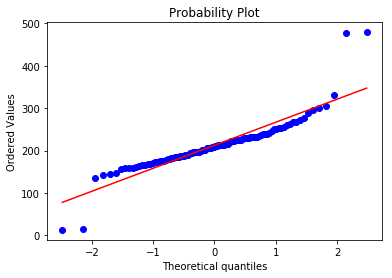

In [148]:
# check if the data is right skewed
stats.probplot(data,dist='norm',plot=pylab)
pylab.show()

In [164]:
def check_skew(data, feature):
    sns.distplot(data[feature], fit=norm)
    (mu, sigma) = norm.fit(data[feature])
    print('n\mu = {:.2} and sigma = {:.2f}\n'.format(mu, sigma))
    
    plt.legend(['Normal list. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
    plt.ylabel('Frequency')
    
    fig = plt.figure()
    res = stats.probplot(data[feature], plot=plt)
    plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


n\mu = 2.1e+02 and sigma = 58.80



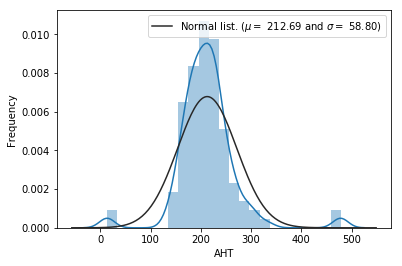

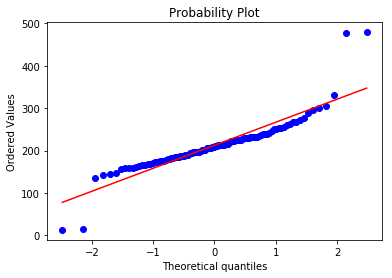

In [165]:
check_skew(raw_data,'AHT')

0.025    139.632685
0.500    210.289585
0.975    315.656813
Name: AHT, dtype: float64


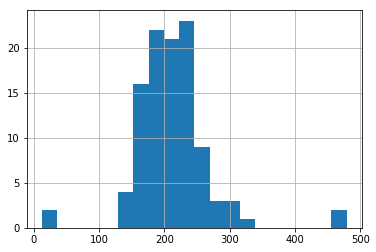

In [139]:
# check quantile and distribution of raw data 
print(raw_data.AHT.quantile([0.025,0.5,0.975]))
raw_data.AHT.hist(bins=20)

In [131]:
# create a boostrap function
def bootstrap(data,num_samples,statistic,alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI and mean for statistic."""
    n = len(data)
    idx = npr.randint(0,n,(num_samples,n))
    samples = data[idx]
    stat = np.sort(statistic(samples,1))
    return (stat[int((alpha/2.0)*num_samples)],
           stat[int((1-alpha/2.0)*num_samples)],
           stat[int(num_samples/2)])

In [133]:
# develop a function to generate resampling stats
def resampling(data):
    temp = {'N':[],'lower':[],'upper':[],'mean':[]}
    N = [100,1000,2000,5000,10000]
    for n in N:
        lower,upper,mean = bootstrap(data,n,np.mean,0.05)
        temp['N'].append(n)
        temp['lower'].append(lower.round(2))
        temp['upper'].append(upper.round(2))
        temp['mean'].append(mean.round(2))
    stat = pd.DataFrame.from_dict(temp)
    return stat

In [134]:
stats = resampling(data)
stats

,N,lower,upper,mean
0,100,200.80,226.38,213.20
1,1000,202.03,225.33,212.46
2,2000,201.71,224.34,212.73
3,5000,201.69,224.17,212.41
4,10000,201.59,224.15,212.46


In [87]:
def bootstrap_resample(X,n=None):
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample.mean()

In [143]:
# generate a table to save bagging result
def resample(df):
    temp = {'id':[], 'value':[]}
    for i in range(1000):
        cal = bootstrap_resample(df)
        temp['id'].append(i)
        temp['value'].append(cal)
    
    df = pd.DataFrame.from_dict(temp)
    return df

In [144]:
diff_distribution = resample(data)

0.025    201.818864
0.500    212.543672
0.975    224.061457
Name: value, dtype: float64


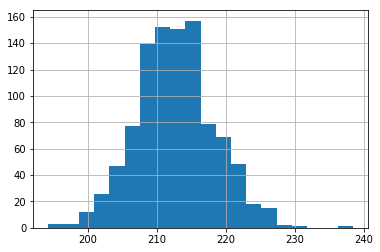

In [146]:
print(diff_distribution.value.quantile([.025,.5,.975]))
diff_distribution.value.hist(bins=20)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


n\mu = 2.1e+02 and sigma = 5.67



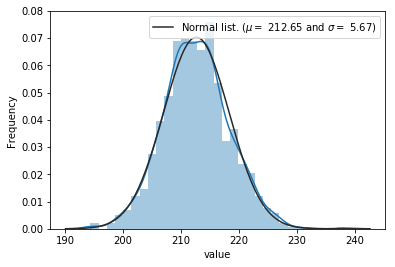

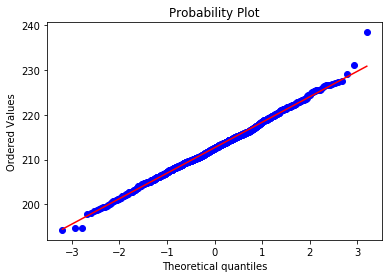

In [166]:
check_skew(diff_distribution,'value')